# 1.4 Método de la *secante*

[![Open In Colab](./imagenes/colab-badge.png)](https://colab.research.google.com/github/caramirezs/MetNum_librodigital/blob/master/1_Ecuaciones_de_una_variable/1.4_Metodo_de_la_secante.ipynb)

In [11]:
# EJECUTAR ESTA CELDA
# Librerias y Funciones iniciales
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def graficar(f, x_i, x_f, num=1000):
    """
    Gráfica de funciones algebraicas
    :param f: función, previamente definida
    :param x_i: límite inferior del intervalo
    :param x_f: límite superior del intervalo
    :param num: división del intervalo
    :return: figura y objeto de ejes para la gráfica de la función
    """
    sns.set_style('darkgrid') # Agrega el estilo "dark" de Seaborn
    # Crea un arreglo de valores x equiespaciados entre x_i y x_f con una longitud de num.
    x = np.linspace(x_i, x_f, num)
    # Crea una figura y un objeto de ejes (axis) utilizando matplotlib.
    # figsize se utiliza para establecer el tamaño de la figura.
    fig, ax = plt.subplots(figsize=(20,8))
    # Grafica la función f(x) en el objeto de ejes creado anteriormente.
    ax.plot(x, f(x))
    # Obtiene los límites inferior y superior de x y y de los ejes del objeto de ejes.
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    # label size de los ejes
    ax.tick_params(labelsize=20, axis='x')
    ax.tick_params(labelsize=20, axis='y')
    # Agrega flechas a los ejes x e y para indicar su dirección.
    ax.annotate("", xy=(xmax, 0), xytext=(xmin, 0), arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
    ax.annotate("", xy=(0, ymax), xytext=(0, ymin), arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
    # Devuelve la figura y el objeto de ejes para que puedan ser manipulados y mostrados según se desee.
    return fig, ax

def met_secante(f, p_00, p_0, tol=1e-4, n=50, verbose=True):
    """
    Método de la secante para encontrar la solución de la ecuación f(x) = 0.
    :param f: Función previamente definida a la que se le intenta encontrar una solución.
    :param p_0: Semilla inicial
    :param p_00: Semilla inicial
    :param tol: Tolerancia para el criterio de parada (por defecto, 1e-4).
    :param n: Número máximo de iteraciones para el criterio de parada (por defecto, 50).
    :param verbose: Si se debe imprimir información de la iteración en cada paso (por defecto, True).

    :return: Solución exacta o aproximada, si existe.
    """
    # Inicializar variables
    i = 1
    if verbose:
        print(f'ite 0: p_00 = {p_00:.5f}, p_0 = {p_0:.5f}')
    # Realizar iteraciones
    while i <= n:

        # Calcular punto de corte de la recta con el eje
        p_i = p_0 - f(p_0)*(p_00 - p_0)/(f(p_00) - f(p_0))  # Recta secante
        e_abs = abs(p_0 - p_i)

        # Imprimir información
        if verbose:
            print(f'ite {i:<2}: p_{i:<2} = {p_i:.5f}, e_abs: {e_abs:e}')

        # Si encontramos la solución exacta, retornarla
        if f(p_i) == 0:
            print(f'>>> Solución exacta encontrada después de {i} iteraciones: x->{p_i:.15f}')
            return p_i

        # Actualizar variables
        p_00 = p_0
        p_0 = p_i

        # Si la tolerancia se ha alcanzado, retornar solución
        if e_abs < tol:
            print(f'>>> Solución encontrada después de {i} iteraciones: x->{p_i:.15f}')
            return p_i

        # Incrementar contador
        i += 1

    print('solución no encontrada, iteraciones agotadas')
    return None

## Introducción
Ahora, consideremos el método de la secante, otro método numérico que se usa para encontrar raíces de ecuaciones no lineales. A diferencia del método de Newton-Raphson, el método de la secante no requiere la evaluación de la derivada de la función en cada iteración, lo que lo hace más eficiente en algunos casos. En lugar de esto, se utiliza una aproximación de la derivada basada en dos puntos cercanos.

El método de la secante comienza con dos aproximaciones cercanas iniciales (*semillas*) $p_{00}$ y $p_0$ de la raíz de la ecuación. En cada iteración, se utiliza la recta que pasa por los puntos $(p_{00},f(p_{00}))$ y $(p_0,f(p_0))$ para estimar la ubicación de la raíz. La intersección de esta recta con el eje-$x$ da la próxima aproximación de la raíz. Este proceso se repite hasta que se alcance la precisión deseada.

Aunque el método de la secante es más lento que el método de Newton-Raphson, no requiere la evaluación de la derivada de la función en cada iteración, lo que lo hace más útil en casos donde la derivada no es fácil de calcular o no está disponible. Además, este método puede ser utilizado para encontrar múltiples raíces en una misma función, siempre y cuando se conozcan dos aproximaciones iniciales cerca de cada raíz.

Para ilustrar la aplicación del método de la secante, consideremos la ecuación no lineal $e^x - 3 \sin(x) - 3x = 0$ que estudiamos con el método de Newton-Raphson. Definimos la función $f(x) = e^x - 3 \sin(x) - 3x$. Elegimos las semillas $p_{00} = 3.5$ y $p_0 = 3.4$, encontramos la recta secante y la intersección de esta con el eje-$x$ ($p_1$), repetimos el proceso hasta que lleguemos a la solución con la precisión deseada. El siguiente código ilustra este proceso.

(*Nota*: Puede modificar el código probando con otra función y modificando las semillas, tolerancia y el máximo número de iteraciones)

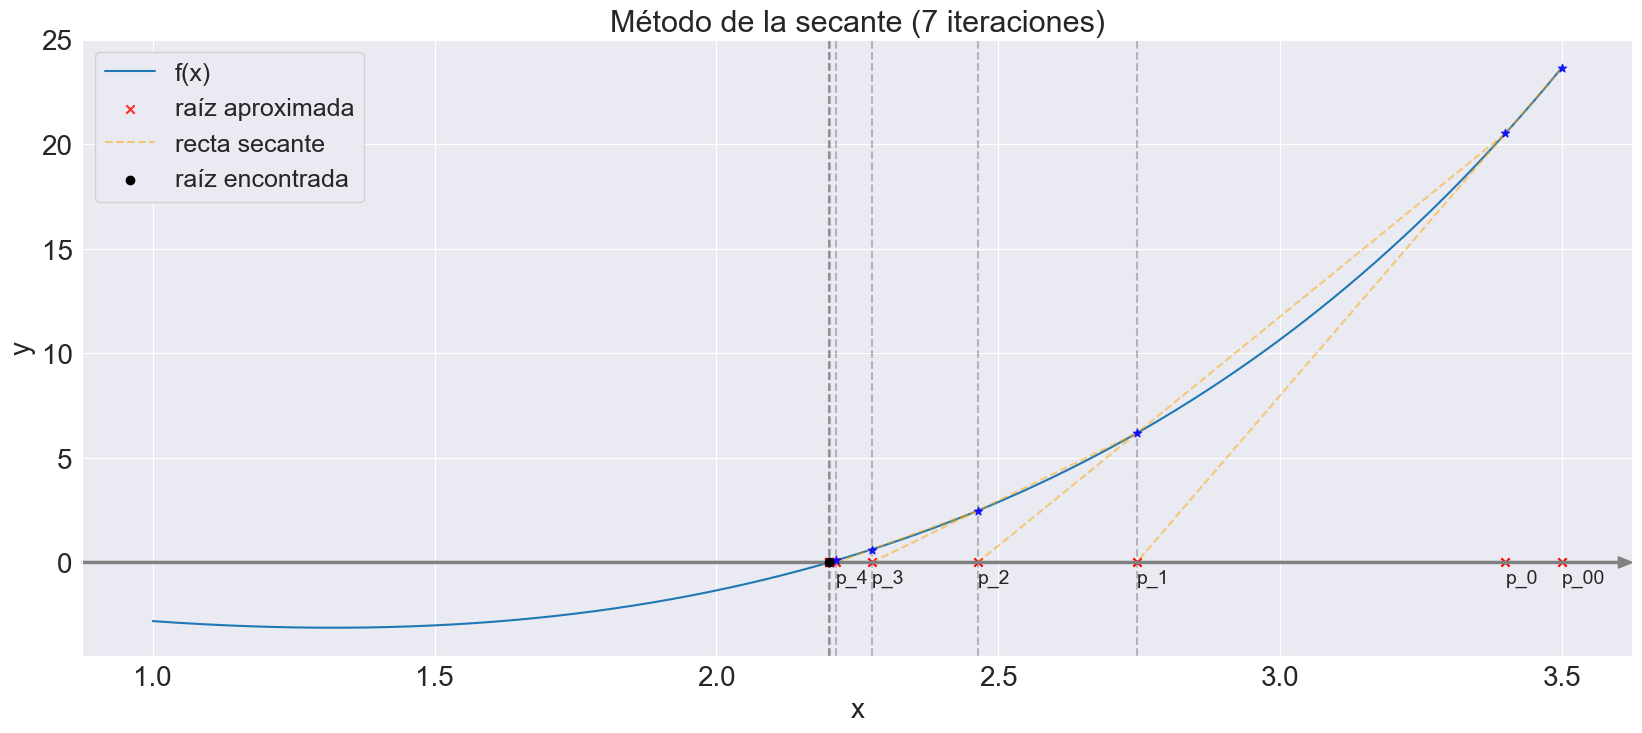

La secuencia para encontrar la solución fue: [3.5, 3.4, 2.7455, 2.4638, 2.2753, 2.2125, 2.2007, 2.2001, 2.2001]


In [4]:
# EJECUTAR ESTA CELDA
# Definir la función
f = lambda x: np.exp(x) - 3*np.sin(x) - 3*x
# Definir el intervalo, tolerancia y No. máximo de iteraciones
p_00, p_0 = 3.5, 3.4
tolerancia = 1e-4
max_ite = 100

# Crea un arreglo de valores x equiespaciados entre x_i y x_f con una longitud de num.
x_i, x_f = 1, 3.5
x = np.linspace(x_i, x_f, 1000)
# Inicializar la lista de aproximaciones
lista_sol = [p_00, p_0]

sns.set_style('darkgrid') # Agrega el estilo "dark" de Seaborn
# Crea una figura y un objeto de ejes (axis) utilizando matplotlib.
# figsize se utiliza para establecer el tamaño de la figura.
fig, ax = plt.subplots(figsize=(20, 8))
# Graficar la función
ax.plot(x, f(x), label='f(x)')
ax.scatter([p_0,p_00], [f(p_0), f(p_00)], color='blue', alpha=0.8, marker='*', zorder=3)
ax.scatter([p_0,p_00], [0, 0], color='red', alpha=1, marker='x', zorder=2)
plt.text(p_0, -1, f"p_0", fontsize=14)
plt.text(p_00, -1, f"p_00", fontsize=14)

# Iterar hasta que la tolerancia sea alcanzada o se supere el número máximo de iteraciones
ite= 1
while ite <= max_ite:
    if f(p_0) == 0 or f(p_00) == f(p_0):
        break
    p_i = p_0 - (f(p_0) * (p_00 - p_0)) / (f(p_00) - f(p_0))  # recta secante
    # Agregar p_i a la lista de aproximaciones
    lista_sol.append(round(p_i,4))

    # Graficar la línea vertical en p_i y el punto en la grafica
    ax.axvline(x=p_i, linestyle='--', color='gray', alpha=0.5, zorder=2)
    ax.scatter(p_i, f(p_i), color='blue', alpha=0.8, marker='*', zorder=3)
    ax.scatter(p_i, 0, color='red', alpha=1, marker='x', zorder=2)
    # texto
    if ite <= 4:
        plt.text(p_i, -1, f"p_{ite}", fontsize=14)
        plt.plot([p_00, p_i], [f(p_00), 0], '--', color='orange', alpha=0.5, zorder=2)

    if abs(p_i-p_0) < tolerancia:
        break
    p_00 = p_0
    p_0 = p_i
    ite += 1

# Graficar el punto final encontrado
ax.scatter(p_i, 0, color='red', alpha=0.8, marker='x', label='raíz aproximada')
plt.plot([p_0, p_i], [f(p_0), 0], '--', color='orange', alpha=0.5, label='recta secante', zorder=2)
ax.scatter(p_i, f(p_i), color='black', label='raíz encontrada', zorder=3)


### EJES ###
# Obtiene los límites inferior y superior de x y y de los ejes del objeto de ejes.
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
# label size de los ejes
ax.tick_params(labelsize=20, axis='x')
ax.tick_params(labelsize=20, axis='y')
# Agrega flechas a los ejes x e y para indicar su dirección.
ax.annotate("", xy=(xmax, 0), xytext=(xmin, 0), arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10), zorder=2)
ax.annotate("", xy=(0, ymax), xytext=(0, ymin), arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10), zorder=2)

# Configurar la gráfica
plt.legend(fontsize=18)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.title(f'Método de la secante ({ite} iteraciones)', fontsize=22)
plt.show()
print(f'La secuencia para encontrar la solución fue: {lista_sol}')

En general, el método de la secante no converje tan rápido como lo hace el de Newton-Rapshon, pero generalmente si converge más rápido que el de bisección o la falsa posición. En el ejemplo previo, el método de bisección necesitó 15 iteraciones para alcanzar la solución, el método de falsa posición tomó 8, Newton-Raphson solo necesitó 6 y el método de la secante 7 iteraciones. Además, el método no requiere la determinación de un intervalo $[a,b]$ ni el uso de la derivada de $f$, para este caso únicamente se necesita dos semillas cercanas $p_{00}$ y $p_0$ para comenzar el proceso iterativo.

## Fórmula
Iniciemos calculando $p_1$ a partir de las semilla $p_{00}$ y $p_0$ para luego pensar en la fórmula general del método.
La ecuación de la recta que pasa por $(p_{00}, f(p_{00}))$ y $(p_0, f(p_0))$ se puede calcular de manera similar a como se calculó en la falsa posición
$$y=\frac{f(p_{00}) - f(p_0)}{p_{00}-p_0}(x-p_0)+f(p_0)$$
para hallar el corte con el eje-$x$ se debe reemplazar $y=0$ y $x=p_{n+1}$, así
$$0=\frac{f(p_{00}) - f(p_0)}{p_{00}-p_0}(p_{n+1}-p_0)+f(p_0)$$
al despejar $p_{n+1}$ se llega a la fórmula del método:
$$p_{n+1} = p_0 - \frac{f(p_0) * (p_{00} - p_0)}{f(p_{00}) - f(p_0)}$$

Este proceso se puede generalizar para encontrar $p_{n+1}$ a partir de $p_n$ y $p_{n-1}$ en el n-ésimo intervalo:
$$p_{n+1} = p_n - \frac{f(p_n) * (p_{n-1} - p_n)}{f(p_{n-1}) - f(p_n)}$$

## Método de la secante paso a paso:

**Paso 1**: Seleccionar las semilla $p_{00}$ y $p_0$.

**Paso 2**: Calcular el valor donde la recta secante se interseca con el eje-$x$, la fórmula utilizada es $p_{n+1} = p_n - \frac{f(p_n) * (p_{n-1} - p_n)}{f(p_{n-1}) - f(p_n)}$. Tener cuidado con la división por cero, si $f(p_{n-1}) = f(p_n)$ el proceso no puede continuar.

**Paso 3**: Comprobar si $f(p_n) = 0$ o si $p_n$ cumple con la tolerancia deseada ($e_a = |p_n - p_{n-1}|$); si es así, el método finaliza, de lo contrario continúa.

Se repiten los pasos 2 y 3 hasta alcanzar una tolerancia de error deseada o hasta que se agoten el número de iteraciones permitido.

Al igual que el método de Newton-Raphson, la elección inicial de las semillas puede afectar significativamente la convergencia del método. También es importante mencionar que el método de la secante puede ser afectado por la estabilidad numérica, especialmente en casos donde $f(p_{n-1})$ y $f(p_n)$ se aproximen al mismo valor. En estos casos, se pueden utilizar variaciones del método, para mejorar la estabilidad y la convergencia.

## Ejemplos
### Ejemplo práctico 1: Resolución de Ecuación no Lineal mediante el método de Newton-Raphson

Resolver la ecuación $e^{2x} - \cos(2 \pi x) = 5$ con una tolerancia de $10^{-3}$ utilizando el método de la secante. Comparar esta solución con el ejemplo estudiado en el método de Newton-Raphson.

Primero, se establece la función $f$ tal que $f(x) =0$, es decir, $f(x) = e^{2x} - \cos(2 \pi x) -5 $. El siguiente paso es escoger las semillas. En este caso, podemos elegir $p_{00} = 0$ y $p_0 = 0.2$ como una opción razonable, ya que la gráfica de la función sugiere que la solución está cerca de ese valor

(<Figure size 2000x800 with 1 Axes>, <Axes: >)

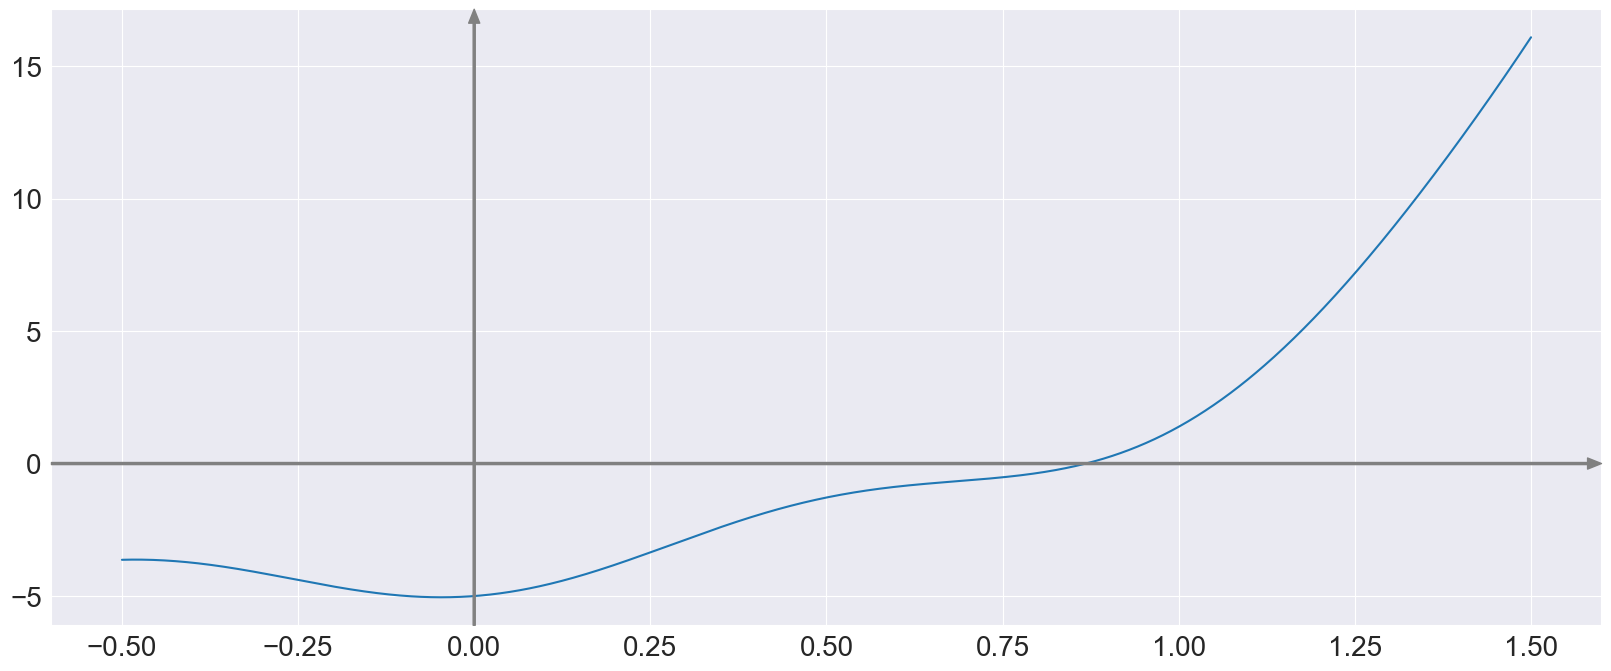

In [7]:
f = lambda x: np.exp(2*x) - np.cos(2*np.pi*x) - 5
graficar(f, -0.5 , 1.5)

Luego, se pueden aplicar las iteraciones del método de la secante utilizando la fórmula $p_{n+1} = p_n - \frac{f(p_n) * (p_{n-1} - p_n)}{f(p_{n-1}) - f(p_n)}$. El proceso se detiene cuando la diferencia entre dos iteraciones consecutivas es menor a la tolerancia deseada, es decir, cuando $|p_{n} - p_{n-1}| < 10^{-3}$.

$$p_1 = p_0 - \frac{f(p_0) * (p_{00} - p_0)}{f(p_{00}) - f(p_0)} = 0.84545, \ \ \  e_{abs} = |p_1 - p_0| = 0.6454460$$
$$p_2 = p_1 - \frac{f(p_1) * (p_{0} - p_1)}{f(p_{0}) - f(p_1)} = 0.87003, \ \ \  e_{abs} = |p_2 - p_1| = 0.0248871$$
$$p_3 = p_2 - \frac{f(p_2) * (p_{1} - p_2)}{f(p_{1}) - f(p_2)} = 0.86794, \ \ \  e_{abs} = |p_3 - p_2| = 0.0020929$$
$$p_4 = p_3 - \frac{f(p_3) * (p_{2} - p_3)}{f(p_{2}) - f(p_3)} = 0.86811, \ \ \  e_{abs} = |p_4 - p_3| = 0.0006620$$


Después de aplicar cuatro iteraciones, se obtiene una solución de aproximadamente $p \approx 0.86811$. Se puede verificar que esta solución es correcta al sustituirla en la ecuación original y verificar que el resultado es cercano a 5.

$$e^{2(0.86811)} - \cos(2 \pi (0.86811)) \approx 5$$

Podemos verificar el razonamiento anterior utilizando la función `met_secante(f, 0, 0.2, tol=1e-3)` para encontrar la solución con la precisión deseada y ver cada paso de la iteración:

In [13]:
met_secante(f, 0, 0.2, tol=1e-3)

ite 0: p_00 = 0.00000, p_0 = 0.20000
ite 1 : p_1  = 0.84545, e_abs: 6.454460e-01
ite 2 : p_2  = 0.87003, e_abs: 2.458871e-02
ite 3 : p_3  = 0.86794, e_abs: 2.092913e-03
ite 4 : p_4  = 0.86811, e_abs: 1.662047e-04
>>> Solución encontrada después de 4 iteraciones: x->0.868107966640642


0.8681079666406422

Al comparar el uso de este método con el método de Newton-Raphson observamos que su convergencia es más rápida y se está llegando a la solución con la precisión deseada.

## Desventajas del método de la secante
Si bien el método de la secante tiene varias ventajas, también tiene algunas desventajas que deben tenerse en cuenta al decidir si utilizar este método numérico para resolver un problema específico.

En primer lugar, la convergencia del método de la secante no está garantizada. A diferencia del método de Newton-Raphson, que siempre converge si la semilla inicial está suficientemente cerca de la solución, el método de la secante solo converge bajo ciertas condiciones. Específicamente, la función debe ser continua y las dos semillas iniciales deben estar lo suficientemente cerca de la solución.

Otra desventaja del método de la secante es que puede requerir más iteraciones que otros métodos numéricos para alcanzar la misma precisión. A diferencia del método de Newton-Raphson, que utiliza la derivada de la función para mejorar la aproximación de la solución en cada iteración, el método de la secante solo utiliza dos puntos para aproximar la pendiente de la función. Esto significa que, en general, el método de la secante converge más lentamente que el método de Newton-Raphson.

Finalmente, el método de la secante es más propenso a la divergencia que el método de Newton-Raphson. Si las semillas iniciales están demasiado lejos de la solución, el método de la secante puede no converger. En este caso, el método puede ser menos eficiente que otros métodos numéricos más robustos.

## Conclusiones
El método de la secante es un método numérico útil y eficiente para encontrar soluciones de ecuaciones no lineales, especialmente en situaciones donde la derivada de la función es difícil de calcular. El método se basa en una aproximación de la pendiente de la función utilizando dos puntos cercanos a la solución. Aunque el método tiene varias ventajas, como la simplicidad de la implementación y la capacidad para manejar funciones no diferenciables, también tiene algunas limitaciones importantes, como la falta de garantía de convergencia y la posibilidad de divergencia en algunas situaciones.

Es interesante notar que el método de la secante y el método de la falsa posición tienen algunas similitudes. Ambos métodos se basan en la idea de utilizar una línea recta para aproximar la curva de la función y determinar la intersección con el eje-$x$. Sin embargo, el método de la falsa posición utiliza dos puntos con signos opuestos de la función en lugar de dos puntos cercanos, y ajusta la posición de la intersección de la línea recta con el eje-$x$ de acuerdo con el signo de la función en la nueva aproximación. Aunque el método de la falsa posición tiene una convergencia garantizada similar al método de bisección, también tiene algunas limitaciones y es menos eficiente que el método de la secante. En general, la elección del método más adecuado para un problema dado dependerá de las características de la función y las condiciones del problema.

## Ejercicios
1. Utiliza el método de la secante para determinar la raíz de $f(x) = \cos(\sqrt{x^3}) - x$ con una precisión de $10^{-6}$. Compare sus resultados con la dificultad de utilizar el método de Newton-Raphson.
2. Utiliza el método de la secante para determinar la raíz más grande de $f(x) = -0.2 x^4 + 0.5 x^3 - 0.2 x + 8$ con una precisión de $10^{-6}$. Compare sus resultados con la dificultad de utilizar el método de Newton-Raphson.
3. Encuentra la solución de la ecuación $f(x) = e^x - \cos(x)$ con una precisión de $10^{-5}$ comparela con las soluciones obtenidas con los otros métodos
4. Localice la primera raíz positiva de $f(x) = \sin(x) + \cos(1 + x^2) - 1$. Utilicela para encontrar una solución de la ecuación $\sin(x) + \cos(1 + x^2) = 1$. Compare sus resultados con la dificultad de utilizar el método de Newton-Raphson.

### Aplicación
La población de una especie usualmente se puede modelar sobre períodos cortos de tiempo asumiendo que esta crece continuamente a una razón proporcional al número de especies presentes en determinado instante. Si se supone que cierto porcentaje de la especie migra a una tasa constante, el modelo de la población se puede expresar como:

$$\dfrac{dN(t)}{dt} = \lambda N(t) + \rho $$

donde $\lambda$ representa la tasa de crecimiento de la población y $\rho$ la tasa de migración. La solución de la ecuación diferencial es:

$$N(t) = N_0 e^{\lambda t} + \dfrac{\rho}{\lambda} \left(e^{\lambda t} - 1 \right)$$

donde $N_0$ es la población inicial.

Suponga que la población de cierta especie inicialmente es $N(0) = 560000$ individuos, un año después la población aumentó a $N(1)=958000$ y durante ese año migraron $\rho = 120000$ individuos. Determine la tasa de crecimiento $\lambda$ del modelo.